In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# following code block will enable output wrapping
from IPython.display import HTML, display

def set_css():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))
get_ipython().events.register('pre_run_cell', set_css)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# use this cell to import all the neccessary dependancies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import Normalize
import plotly.offline as pyo
from scipy.stats import linregress

In [ ]:
df_city_data = pd.read_csv('/content/drive/MyDrive/Spring_2024/CSC_46000/Homework_2/100cities_data.xlsx - data.csv')
df_art_collector_data = pd.read_csv('/content/drive/MyDrive/Spring_2024/CSC_46000/Homework_2/Henry_Clay_Frick_ptgs_1919.xlsx - Sheet2.csv')

In [ ]:
# check to see the dataframe output
print(type(df_city_data))
df_city_data.head(10)

<class 'pandas.core.frame.DataFrame'>


,city,country,economic development,continent,continent2,gni,lat,lon,,tweet20119,...,actor201312,actor20141,actor20142,actor20143,actor20144,actor20145,actor20146,actor20147,twchange,actorchange
0,London,United Kingdom,High income,Europe,Western Europe,43390.0,51.507351,-0.127758,NaN,198,...,22878,22080,24006,27578,26945,28272,29700,17346,0.090923,0.076025
1,Tokyo,Japan,High income,Asia,East Asia,36680.0,35.709026,139.731992,NaN,249,...,14513,12419,11786,16813,17165,19583,18598,10869,0.089418,0.075343
2,Jakarta,Indonesia,Lower middle income,Asia,South East Asia,3440.0,-6.208763,106.845599,NaN,48,...,17485,15877,13825,14659,14697,15181,15641,8977,0.170556,0.147211
3,Istanbul,Turkey,Upper middle income,Asia,Eastern Europe,9950.0,41.008238,28.978359,NaN,4,...,13803,12159,11942,15480,20921,22486,22165,11899,0.135740,0.119107
4,Paris,France,High income,Europe,Western Europe,40540.0,48.856614,2.352222,NaN,107,...,10709,9990,9971,11708,11122,10686,12902,6459,0.104758,0.086679
5,Mexico City,Mexico,Upper middle income,North America,Central America,9710.0,19.432608,-99.133208,NaN,23,...,8948,8201,7734,10753,11798,12822,13399,7293,0.110544,0.086278
6,Manila,Philippines,Lower middle income,Asia,South East Asia,3550.0,14.599512,120.984219,NaN,22,...,7769,7866,5573,6583,6212,6917,7518,5188,0.129583,0.086633
7,Bangkok,Thailand,Upper middle income,Asia,South East Asia,5720.0,13.756331,100.501765,NaN,29,...,6387,6101,4447,6397,7271,7471,7637,4609,0.129136,0.092196
8,Barcelona,Spain,High income,Europe,Western Europe,28530.0,41.385064,2.173404,NaN,32,...,6167,5485,6622,7247,7552,8017,8444,4801,0.092109,0.071937
9,Bogota,Colombia,Upper middle income,South America,South America,7140.0,4.710989,-74.072092,NaN,3,...,8151,7701,5718,6342,6600,7796,9078,6182,0.167218,0.126516


In [ ]:
# take a look at the second set of dataset that was imported
print(type(df_art_collector_data))

df_art_collector_data.style.set_properties(subset=['text'], **{'width': '400px'})
df_art_collector_data.head()

<class 'pandas.core.frame.DataFrame'>


,Object Number,File name,Henry Clay Frick Acquisition Date,Acquisition Year,Vendor who sold to Henry Clay Frick,Classification,Culture,Artist,Artist life dates,Title,Date,Medium,Dimensions,"Height, inches","Width, inches","Height, cm","Width, cm",Area,Credit Line,Provenance
0,1896.1.32,18961032.tif,07/28/1896,1896,"M. Knoedler & Co., New York, N.Y.",Painting-French,French,Charles-François Daubigny,1817-1878,The Washerwomen,1870–74,Oil on canvas (lined),20 7/8 x 31 1/2 in. (53 x 80 cm),20 7/8,31 1/2,53.0,80.0,4240.00,Henry Clay Frick Bequest,"David Sellar, London. Sourigne sale, February..."
1,1897.1.36,18961036.tif,11/18/1897,1897,"M. Knoedler & Co., New York, N.Y.",Painting-French,French,Jules Dupré,1811-1889,The River,19th century,Oil on canvas (lined),17 x 23 in. (43.2 x 58.4 cm),17,23,43.2,58.4,2522.88,Henry Clay Frick Bequest,"Émile Gavet, Paris, 1867. Laurent-Richard sale..."
2,1898.1.104,18981104.tif,02/09/1898,1898,"M. Knoedler & Co., New York, N.Y.",Painting-British,British,George Romney,1734-1802,Miss Mary Finch-Hatton,1788,Oil on canvas,29 7/8 x 25 1/8 in. (75.9 x 63.8 cm),29 7/8,25 1/8,75.9,63.8,4842.42,Henry Clay Frick Bequest,"Finch-Hatton. Knoedler. Frick, 1898. Source: P..."
3,1898.1.27,18981027.tif,08/27/1898,1898,"M. Knoedler & Co., New York, N.Y.",Painting-French,French,Jean-Baptiste-Camille Corot,1796-1875,Ville-d'Avray,ca. 1860,Oil on canvas (lined),17 1/4 x 29 1/4 in. (43.8 x 74.3 cm),17 1/4,29 1/4,43.8,74.3,3254.34,Henry Clay Frick Bequest,"Said to have belonged to Monjean, Paris. Grima..."
4,1899.1.117,18991117.tif,03/11/1899,1899,"M. Knoedler & Co., New York, N.Y.",Painting-French,French,Constant Troyon,1810-1865,A Pasture in Normandy,1850s,Oil on wood panel,17 x 25 5/8 in. (43.2 x 65.1 cm),17,25 5/8,43.2,65.1,2812.32,Henry Clay Frick Bequest,"Jules Roederer, Le Havre. His sale, June 5, 18..."


In [ ]:
# Part 1: First visualization should present the data in the following columns
# A : df_city_data['city']
# B : df_city_data['country']
# C : df_city_data['economic development']
# D : df_city_data['continent']
# F : df_city_data['gni']  --> stands for gross national income

'''
We have to check the number of unique values that are present within a column.
We also have to check the number of null values that are present within a column. : Done
We also have to check and make sure how we can properly format the data to make it ready for data visualization.
We also have to check the datatype of the five columns we are working with : Done

Since we want to only include 5 columns, we can create a copy of the original dataframe
--> contianing the 5 column of interest.
'''
new_df_city_data = df_city_data[['city', 'country', 'economic development', 'continent', 'gni']].copy()

new_df_city_data

,city,country,economic development,continent,gni
0,London,United Kingdom,High income,Europe,43390.0
1,Tokyo,Japan,High income,Asia,36680.0
2,Jakarta,Indonesia,Lower middle income,Asia,3440.0
3,Istanbul,Turkey,Upper middle income,Asia,9950.0
4,Paris,France,High income,Europe,40540.0
...,...,...,...,...,...
95,Niamey,Niger,Low income,Africa,390.0
96,Mogadishu,Somalia,Low income,Africa,NaN
97,Lome,Togo,Low income,Africa,540.0
98,Conakry,Guinea,Low income,Africa,470.0


In [ ]:
'''
Now that we hvae created the 5 columns of interest, we will have to do some preliminary
checks to get more information on the type of data we are working with, whether it contains null
values or not and formatting the data to the correct datatype to create the 3d scatter plot

Understanding the python code below (line by line):
1. new_df_city_data : This is the pandas dataframe
2. is_null() : this is a method called on the dataframe 'new_df_city_data'.
    --> It returns a cell in 'new_df_city_data' where each cell is either 'True' or 'False'
3. any() method is called on the dataframe returned by isnull(). For each column in the Dataframe,
--> it returns 'True'. If any element is true (means there's at least one NaN values) and
--> returns False otherwise
'''
# check if any null values are present within any of the columns
print(new_df_city_data.isnull().any())

#count the number of null values present within the gni column : output : 2
print(new_df_city_data['gni'].isnull().sum())
print(new_df_city_data.info())  # provides a detailed summary of the information relevant to the dataframe

city                    False
country                 False
economic development    False
continent               False
gni                      True
dtype: bool
2
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city                  100 non-null    object 
 1   country               100 non-null    object 
 2   economic development  100 non-null    object 
 3   continent             100 non-null    object 
 4   gni                   98 non-null     float64
dtypes: float64(1), object(4)
memory usage: 4.0+ KB
None


In [ ]:
# replce the null values with the median instead
new_df_city_data = new_df_city_data.fillna(value={'gni': new_df_city_data['gni'].median()})

# check and see if null values are still present or not
print(new_df_city_data.info())   # as we can see from the output, there are no null values that are present within the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city                  100 non-null    object 
 1   country               100 non-null    object 
 2   economic development  100 non-null    object 
 3   continent             100 non-null    object 
 4   gni                   100 non-null    float64
dtypes: float64(1), object(4)
memory usage: 4.0+ KB
None


In [ ]:
# check all the unique values that are present within the dataframe that we are working with


'''
Seems like we are working with a ton of unique values in this case

'''
print(pd.Series({c : new_df_city_data[c].unique() for c in new_df_city_data}))

city                    [London, Tokyo, Jakarta, Istanbul, Paris, Mexi...
country                 [United Kingdom, Japan, Indonesia, Turkey, Fra...
economic development    [High income, Lower middle income, Upper middl...
continent               [Europe, Asia, North America, South America, A...
gni                     [43390.0, 36680.0, 3440.0, 9950.0, 40540.0, 97...
dtype: object


In [ ]:
'''
We can also view the cities individual

'''
print("Prior to String Manipulation:")
print(new_df_city_data['city'].unique())

Prior to String Manipulation:
['London' 'Tokyo' 'Jakarta' 'Istanbul' 'Paris' 'Mexico City' 'Manila'
 'Bangkok' 'Barcelona' 'Bogota' 'Buenos Aires' 'Moscow' 'Guayaquil'
 'Los Angeles' 'Caracas' 'Santiago' 'Dublin' 'Toronto' 'Kuala Lumpur'
 'Santo Domingo' 'Rome' 'Seoul' 'Amsterdam' 'Singapore' 'Stockholm'
 'Sydney' 'Kuwait City' 'Mecca' 'San Salvador' 'Berlin' 'Lima'
 'Montevideo' 'Asuncion' 'Minsk' 'Cairo' 'Rio de Janeiro' 'Guatemala City'
 'Beirut' 'Brussels' 'Doha' 'Dubai' 'San Jose' 'Kiev' 'Copenhagen'
 'Cape Town' 'Manama' 'Vienna' 'Taipei' 'Ulan Bator' 'San Juan' 'Nairobi'
 'Belgrade' 'Lagos' 'Lisbon' 'Prague' 'Athens' 'Amman' 'Helsinki' 'Mumbai'
 'Panama City' 'Tel Aviv' 'Baghdad' 'Budapest' 'Accra' 'Baku' 'Warsaw'
 'Almaty' 'Casablanca' 'Abidjan' 'Sofia' 'Phnom Penh' 'Kathmandu'
 'Colombo' 'Kampala' 'Bucharest' 'Karachi' 'Damascus' 'Beijing'
 'Ho Chi Minh City' 'Dar es Salaam' 'Dhaka' 'Port au Prince' 'Khartoum'
 'Harare' 'Kabul' 'Brazzaville' 'Addis Ababa' 'Luanda' 'Kigali' 'Ba

In [ ]:
#change all the values to lower and remove the whitespaces
new_df_city_data['city'] = new_df_city_data['city'].str.lower()
new_df_city_data['city'] = new_df_city_data['city'].str.replace(' ', '', regex=False)

print("\nAfter String Manipulation:")
print(new_df_city_data['city'].unique())  # as we can see, all instances


After String Manipulation:
['london' 'tokyo' 'jakarta' 'istanbul' 'paris' 'mexicocity' 'manila'
 'bangkok' 'barcelona' 'bogota' 'buenosaires' 'moscow' 'guayaquil'
 'losangeles' 'caracas' 'santiago' 'dublin' 'toronto' 'kualalumpur'
 'santodomingo' 'rome' 'seoul' 'amsterdam' 'singapore' 'stockholm'
 'sydney' 'kuwaitcity' 'mecca' 'sansalvador' 'berlin' 'lima' 'montevideo'
 'asuncion' 'minsk' 'cairo' 'riodejaneiro' 'guatemalacity' 'beirut'
 'brussels' 'doha' 'dubai' 'sanjose' 'kiev' 'copenhagen' 'capetown'
 'manama' 'vienna' 'taipei' 'ulanbator' 'sanjuan' 'nairobi' 'belgrade'
 'lagos' 'lisbon' 'prague' 'athens' 'amman' 'helsinki' 'mumbai'
 'panamacity' 'telaviv' 'baghdad' 'budapest' 'accra' 'baku' 'warsaw'
 'almaty' 'casablanca' 'abidjan' 'sofia' 'phnompenh' 'kathmandu' 'colombo'
 'kampala' 'bucharest' 'karachi' 'damascus' 'beijing' 'hochiminhcity'
 'daressalaam' 'dhaka' 'portauprince' 'khartoum' 'harare' 'kabul'
 'brazzaville' 'addisababa' 'luanda' 'kigali' 'bamako' 'ouagadougou'
 'antan

In [ ]:
'''
Now let us observe the second column named Country
'''
print("Unique values within the country column:")
print(new_df_city_data['country'].unique())

Unique values within the country column:
['United Kingdom' 'Japan' 'Indonesia' 'Turkey' 'France' 'Mexico'
 'Philippines' 'Thailand' 'Spain' 'Colombia' 'Argentina' 'Russia'
 'Ecuador' 'United States' 'Venezuela' 'Chile' 'Ireland' 'Canada'
 'Malaysia' 'Dominican Republic' 'Italy' 'South Korea' 'Netherlands'
 'Singapore' 'Sweden' 'Australia' 'Kuwait' 'Saudi Arabia' 'El Salvador'
 'Germany' 'Peru' 'Uruguay' 'Paraguay' 'Belarus' 'Egypt' 'Brazil'
 'Guatemala' 'Lebanon' 'Belgium' 'Qatar' 'United Arab Emirates'
 'Costa Rica' 'Ukraine' 'Denmark' 'South Africa' 'Bahrain' 'Austria'
 'Taiwan' 'Mongolia' 'Puerto Rico' 'Kenya' 'Serbia' 'Nigeria' 'Portugal'
 'Czech Republic' 'Greece' 'Jordan' 'Finland' 'India' 'Panama' 'Israel'
 'Iraq' 'Hungary' 'Ghana' 'Azerbaijan' 'Poland' 'Kazakhstan' 'Morocco'
 'Ivory Coast' 'Bulgaria' 'Cambodia' 'Nepal' 'Sri Lanka' 'Uganda'
 'Romania' 'Pakistan' 'Syria' 'China' 'Vietnam' 'Tanzania' 'Bangladesh'
 'Haiti' 'Sudan' 'Zimbabwe' 'Afghanistan' 'Congo' 'Ethiopia' 'Angola

In [ ]:
'''
Perform data manipulation by changing all characters to lowercase and removing all
whitespaces as before

Next remove all instance of whitespaces
'''
new_df_city_data['country'] = new_df_city_data['country'].str.lower()
new_df_city_data['country'] = new_df_city_data['country'].str.replace(' ', '', regex=False)

print("After String Manipulation:")
print(new_df_city_data['country'].unique())

After String Manipulation:
['unitedkingdom' 'japan' 'indonesia' 'turkey' 'france' 'mexico'
 'philippines' 'thailand' 'spain' 'colombia' 'argentina' 'russia'
 'ecuador' 'unitedstates' 'venezuela' 'chile' 'ireland' 'canada'
 'malaysia' 'dominicanrepublic' 'italy' 'southkorea' 'netherlands'
 'singapore' 'sweden' 'australia' 'kuwait' 'saudiarabia' 'elsalvador'
 'germany' 'peru' 'uruguay' 'paraguay' 'belarus' 'egypt' 'brazil'
 'guatemala' 'lebanon' 'belgium' 'qatar' 'unitedarabemirates' 'costarica'
 'ukraine' 'denmark' 'southafrica' 'bahrain' 'austria' 'taiwan' 'mongolia'
 'puertorico' 'kenya' 'serbia' 'nigeria' 'portugal' 'czechrepublic'
 'greece' 'jordan' 'finland' 'india' 'panama' 'israel' 'iraq' 'hungary'
 'ghana' 'azerbaijan' 'poland' 'kazakhstan' 'morocco' 'ivorycoast'
 'bulgaria' 'cambodia' 'nepal' 'srilanka' 'uganda' 'romania' 'pakistan'
 'syria' 'china' 'vietnam' 'tanzania' 'bangladesh' 'haiti' 'sudan'
 'zimbabwe' 'afghanistan' 'congo' 'ethiopia' 'angola' 'rwanda' 'mali'
 'burkinaf

In [ ]:
'''
Now we move on to the third column : economic development

As we can see from the output : array(['High income', 'Lower middle income', 'Upper middle income',
       'Low income'], dtype=object), it only contains 4 different types of unique values
       throughout the column.
'''
new_df_city_data['economic development'].unique()

array(['High income', 'Lower middle income', 'Upper middle income',
       'Low income'], dtype=object)

In [ ]:
# change everything to lower case and remove the whitespaces
new_df_city_data['economic development'] = new_df_city_data['economic development'].str.lower()
new_df_city_data['economic development'] = new_df_city_data['economic development'].str.replace(' ', '', regex=False)

print(new_df_city_data['economic development'].unique())

['highincome' 'lowermiddleincome' 'uppermiddleincome' 'lowincome']


In [ ]:
'''
Now we move on to the fourth column : continent
This column contains 7 unique values : array(['Europe', 'Asia', 'North America', 'South America', 'Australia',
       'Central America', 'Africa'], dtype=object)
'''

new_df_city_data['continent'].unique()

array(['Europe', 'Asia', 'North America', 'South America', 'Australia',
       'Central America', 'Africa'], dtype=object)

In [ ]:
'''
Since we don't want to deal with case sensetive string being mismatched
--> (i.e. Europe and europe being labeled as 2 seperate words),
we should change all the charcters to lower case
'''

new_df_city_data['continent'] = new_df_city_data['continent'].str.lower()
new_df_city_data['continent'].unique()

array(['europe', 'asia', 'north america', 'south america', 'australia',
       'central america', 'africa'], dtype=object)

In [ ]:
'''
Lastly, observe the changes in the last column : gni
'''
print(new_df_city_data['gni'].dtype)   # output: float64
print(new_df_city_data['gni'].unique())  # no duplicate values detected

float64
[43390. 36680.  3440.  9950. 40540.  9710.  3550.  5720. 28530.  7140.
 12460. 11450.  6030. 55980. 11780. 14100. 52580. 47540. 10570.  6240.
 32810. 27450. 48860. 52090. 57920. 60070. 42150. 23550.  3940. 45940.
  6130. 15720.  4190.  6460.  3340.  9850.  3590.  7710. 44250. 83990.
 43090. 10400.  2640. 58550.  6080. 19840. 47410.  6350.  3870. 19320.
  1340.  5540.  2820. 20530. 18140. 20320.  4680. 46550.  1600. 11880.
 35770.  5820. 12980.  1480.  6560. 13340. 11390.  3030.  1420.  7480.
  1070.   730.  3800.   700.  9500.  1440.  1860.  7930.  1990.   920.
  1190.   810.  1920.   860.   610.  2540.   590.  4180.   760.   640.
   420.   380.   620.   390.   540.   470.   980.]


In [ ]:
'''
Information on how the 3d Scatter Plot should be built:
--> use 'gni' as one of the axes (let's say the Z-axis beucase it's numerical)
--> convert two of the categorical variables into numerican codes that can be placed
in the x and y axis
--> Use the remaining categorical variables to modify the appearance of the scatter plot points.
For example, you could vary the color of the points by 'country' and marker style by 'city'
'''

"\nInformation on how the 3d Scatter Plot should be built:\n--> use 'gni' as one of the axes (let's say the Z-axis beucase it's numerical)\n--> convert two of the categorical variables into numerican codes that can be placed\nin the x and y axis\n--> Use the remaining categorical variables to modify the appearance of the scatter plot points.\nFor example, you could vary the color of the points by 'country' and marker style by 'city'\n"

In [ ]:
'''
We can perform numerical encodings for the columns economic development and continent

Prior to performing numerical encoding, we will need to convert it into categorical dat

'''
new_df_city_data['economic development'] = new_df_city_data['economic development'].astype("category")
new_df_city_data['continent'] = new_df_city_data['continent'].astype("category")

#observe the datatype now
print(new_df_city_data.dtypes)

# now we can perform numerical encoding
print("Numerical Encoding of Economic Development:")
print(dict(enumerate(new_df_city_data['economic development'].cat.categories)))

# convert the values corresponding to their numerical key, a form of numerical encoding
new_df_city_data['economic development'] = new_df_city_data['economic development'].cat.codes
new_df_city_data['continent'] = new_df_city_data['continent'].cat.codes

print(new_df_city_data['economic development'].unique())
print(new_df_city_data['continent'].unique())

city                      object
country                   object
economic development    category
continent               category
gni                      float64
dtype: object
Numerical Encoding of Economic Development:
{0: 'highincome', 1: 'lowermiddleincome', 2: 'lowincome', 3: 'uppermiddleincome'}
[0 1 3 2]
[4 1 5 6 2 3 0]


In [ ]:
new_df_city_data.dtypes

city                     object
country                  object
economic development       int8
continent                  int8
gni                     float64
dtype: object

In [ ]:
new_df_city_data.head(20)

,city,country,economic development,continent,gni
0,london,unitedkingdom,0,4,43390.0
1,tokyo,japan,0,1,36680.0
2,jakarta,indonesia,1,1,3440.0
3,istanbul,turkey,3,1,9950.0
4,paris,france,0,4,40540.0
5,mexicocity,mexico,3,5,9710.0
6,manila,philippines,1,1,3550.0
7,bangkok,thailand,3,1,5720.0
8,barcelona,spain,0,4,28530.0
9,bogota,colombia,3,6,7140.0


<ipython-input-109-d0dbcc2b0fca>:15: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.



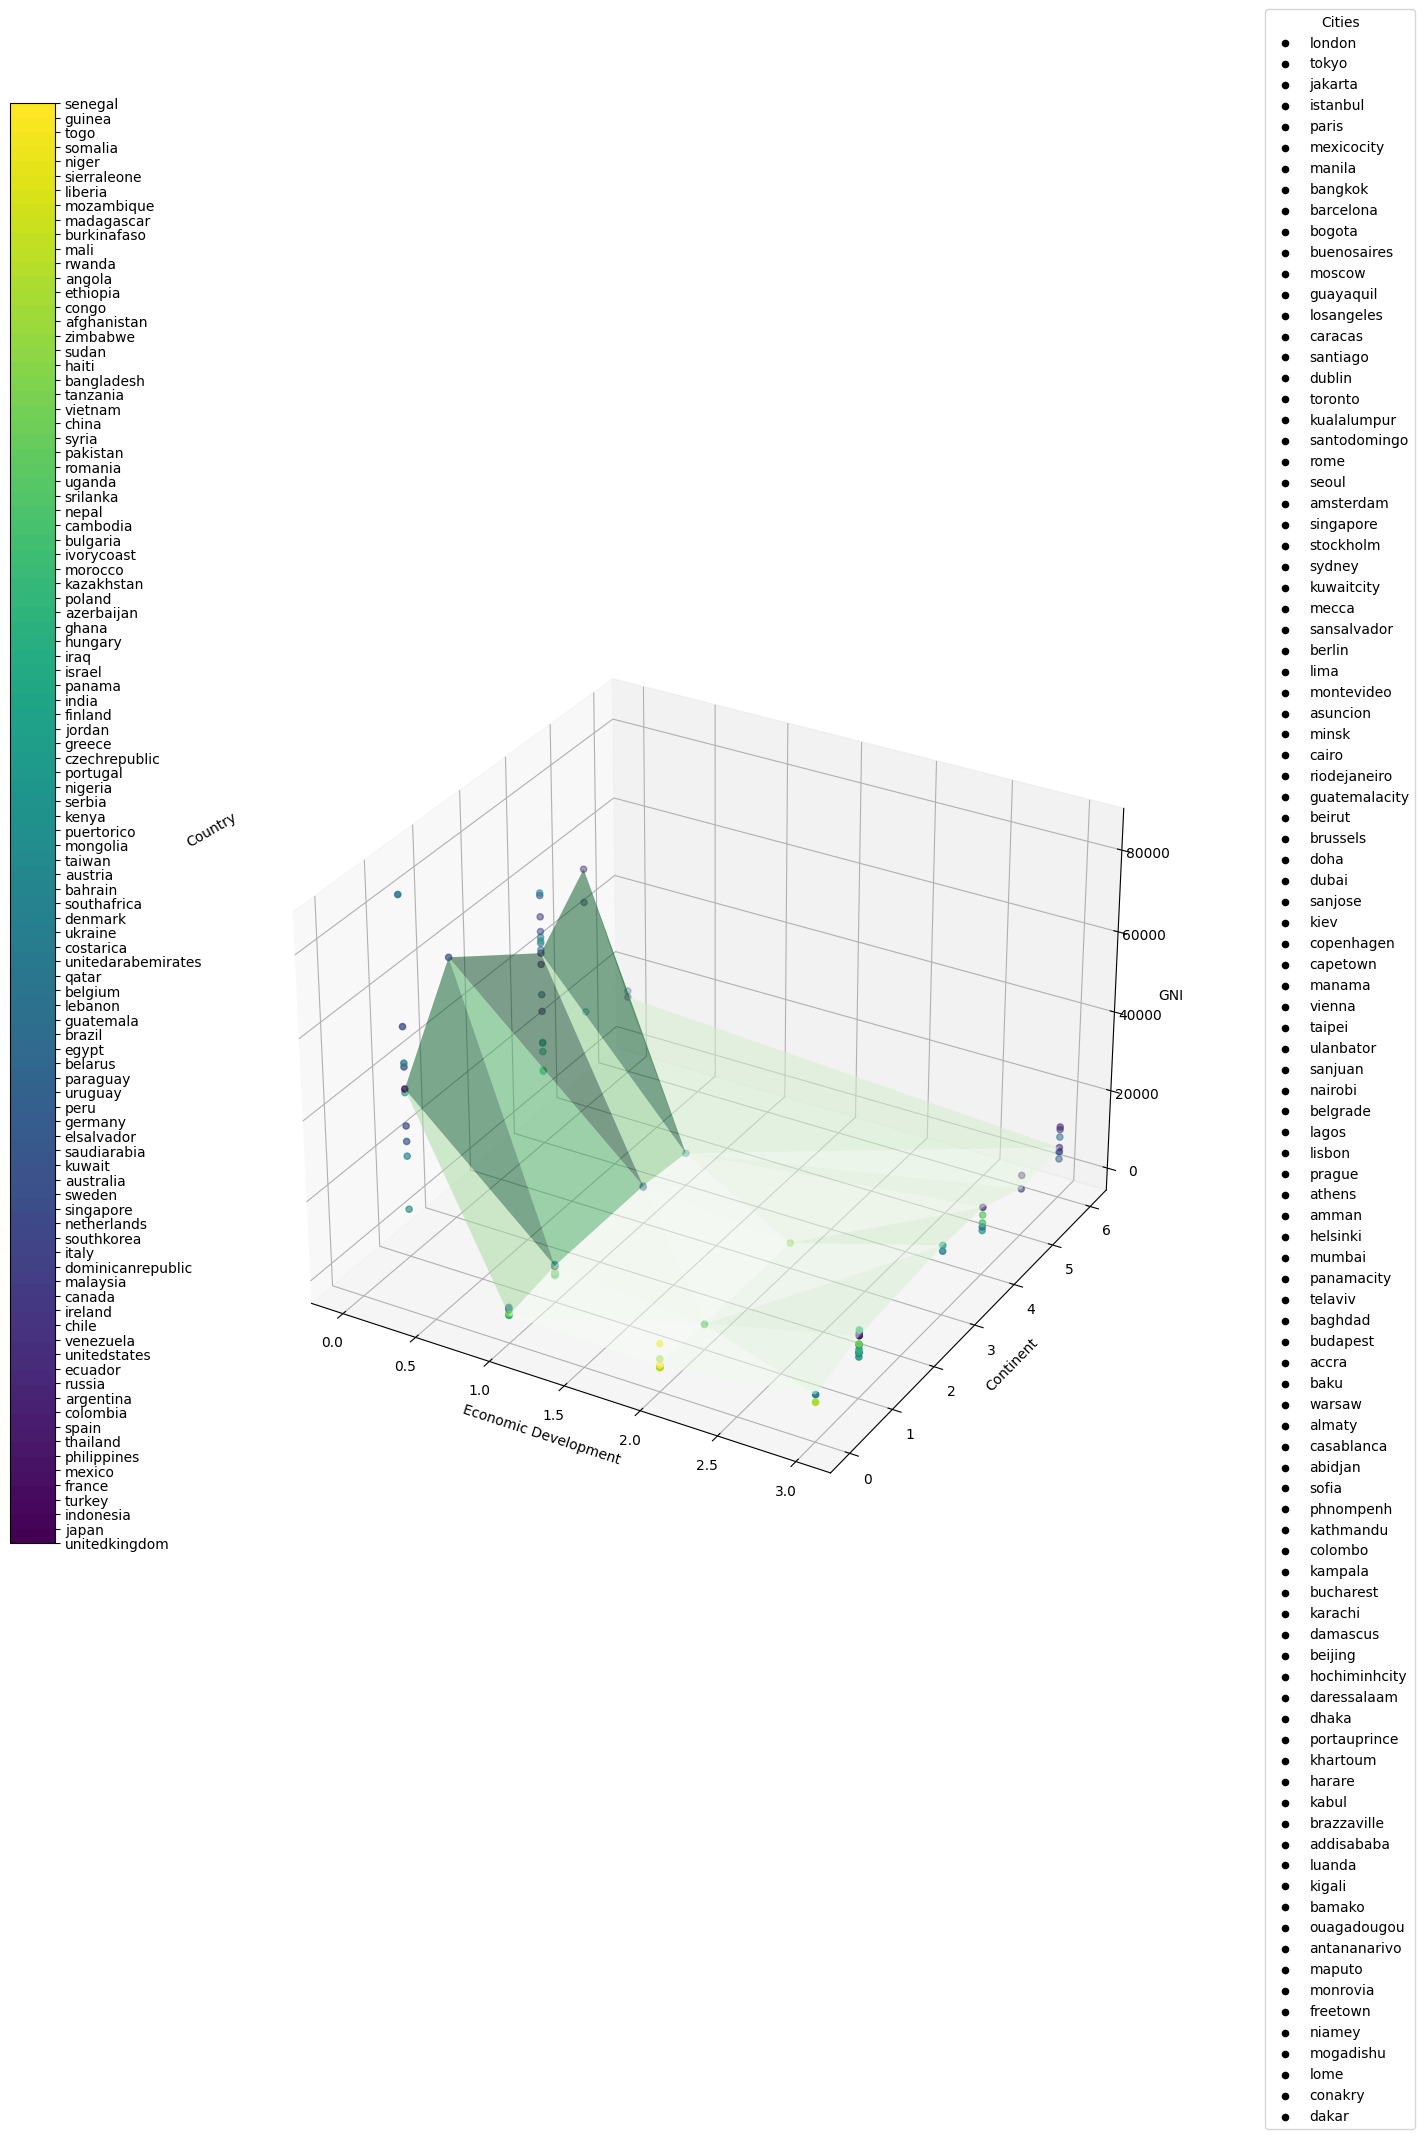

In [ ]:
# Create a figure with a specified size
fig = plt.figure(figsize=(15, 12))
ax = fig.add_subplot(111, projection='3d')

# Set the x, y, z values
x = new_df_city_data['economic development']
y = new_df_city_data['continent']
z = new_df_city_data['gni']

# Factorize the country names to numerical values for color mapping
country_ids = pd.factorize(new_df_city_data['country'])[0]

# Create a colormap and normalizer for countries
norm = Normalize(vmin=country_ids.min(), vmax=country_ids.max())
colormap = plt.cm.get_cmap('viridis', len(np.unique(country_ids)))

# Scatter plot with colors based on country
scatter = ax.scatter(xs=x, ys=y, zs=z, c=country_ids, cmap=colormap, norm=norm)

# Create a colorbar for countries on the left side
# Adjusted the axes coordinates so the colorbar is at the leftmost side of the figure
# Also, the height should be less than 1 to fit within the figure (try values between 0.0 and 1.0)
colorbar_axes_coordinates = [0.05, 0.1, 0.03, 1.2]  # Adjust as needed
cbaxes = fig.add_axes(colorbar_axes_coordinates)
cbar = plt.colorbar(scatter, cax=cbaxes, pad=0.2)
cbar.set_label('Country', rotation=30)
cbar.set_ticks(np.arange(0, len(unique_countries), 1))
cbar.set_ticklabels(unique_countries)  # Set custom tick labels

# Set axis labels
ax.set_xlabel('Economic Development')
ax.set_ylabel('Continent')
ax.set_zlabel('GNI')

# Create the surface to connect scatter plot points
name_color_map_surface = 'Greens'  # Colormap for the 3D surface only.
surf = ax.plot_trisurf(x, y, z, cmap=name_color_map_surface, linewidth=0.2, alpha=0.5)

# Create a legend for cities
unique_cities = pd.unique(new_df_city_data['city'])
# Since there could be a lot of cities, you may want to limit this or find another way to represent this information
# For simplicity, let's create a proxy scatter for each city for the legend
for i, city in enumerate(unique_cities):
    ax.scatter([], [], [], color='k', label=city)

ax.legend(title="Cities", loc='center left', bbox_to_anchor=(1.1, 0.5))

#plt.title('Economic Development, Continent, and GNI by Country', loc="center")
#plt.tight_layout()
# Save the plot as a PNG file
plt.savefig('/content/drive/MyDrive/Spring_2024/CSC_46000/Homework_2/Ayan_Das_24073854_hw2_t1v1.png')
# Show the plot with interactive rotation
plt.show()

In [ ]:
df_city_data.columns

Index(['city', 'country', 'economic development', 'continent', 'continent2',
       'gni', 'lat', 'lon', ' ', 'tweet20119', 'tweet201110', 'tweet201111',
       'tweet201112', 'tweet20121', 'tweet20122', 'tweet20123', 'tweet20124',
       'tweet20125', 'tweet20126', 'tweet20127', 'tweet20128', 'tweet20129',
       'tweet201210', 'tweet201211', 'tweet201212', 'tweet20131', 'tweet20132',
       'tweet20133', 'tweet20134', 'tweet20135', 'tweet20136', 'tweet20137',
       'tweet20138', 'tweet20139', 'tweet201310', 'tweet201311', 'tweet201312',
       'tweet20141', 'tweet20142', 'tweet20143', 'tweet20144', 'tweet20145',
       'tweet20146', 'tweet20147', 'sum_posts', 'actor20119', 'actor201110',
       'actor201111', 'actor201112', 'actor20121', 'actor20122', 'actor20123',
       'actor20124', 'actor20125', 'actor20126', 'actor20127', 'actor20128',
       'actor20129', 'actor201210', 'actor201211', 'actor201212', 'actor20131',
       'actor20132', 'actor20133', 'actor20134', 'actor20135', '

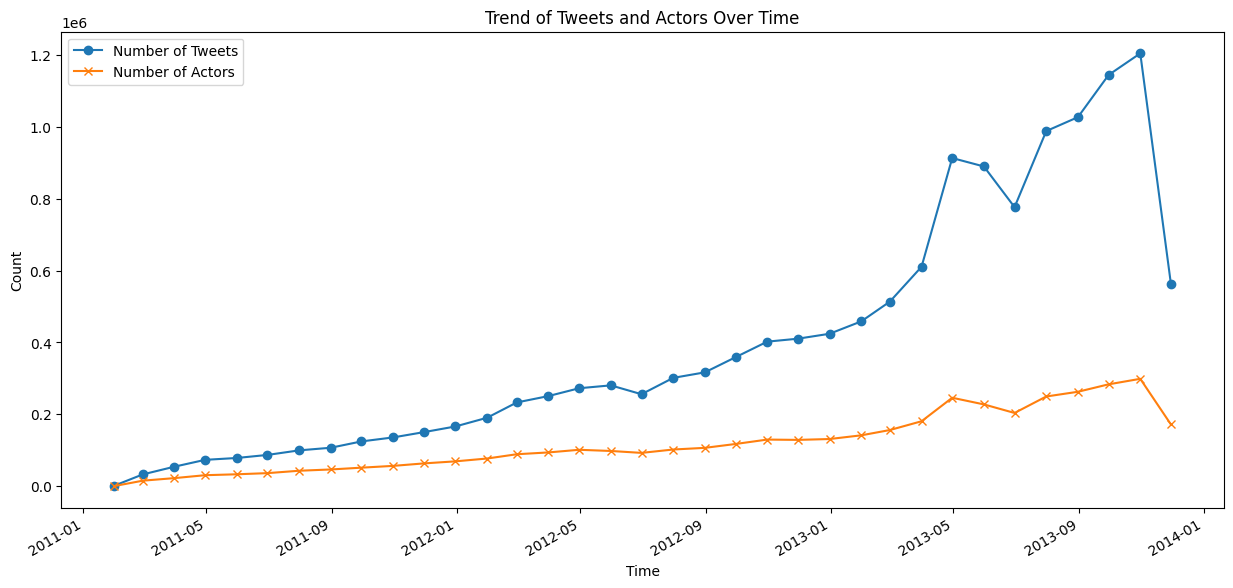

In [ ]:
'''
To create a visualization that shows the trend of both the tweets and actors over the years,
we would generally sum up the number of tweets and actors for each time period and then plot these sums over time.

1. Extract the relevant columns
2. Sum up the values for tweets and actors for each period
3. Create a time series plot with two lines : one for tweets and one for actors
'''
# Select columns for tweets and actors over time
tweet_columns = [col for col in df_city_data.columns if 'tweet' in col and col[-1].isdigit()]
actor_columns = [col for col in df_city_data.columns if 'actor' in col and col[-1].isdigit()]

# Sum up the number of tweets and actors for each time period
tweets_over_time = df_city_data[tweet_columns].sum()
actors_over_time = df_city_data[actor_columns].sum()

# Generate a range of dates/times that matches the columns
# For simplicity, I'm assuming each column is one month apart and starting from January 2011
dates = pd.date_range(start='2011-01', periods=len(tweet_columns), freq='M')

# Plotting
plt.figure(figsize=(15, 7))
plt.plot(dates, tweets_over_time, label='Number of Tweets', marker='o')
plt.plot(dates, actors_over_time, label='Number of Actors', marker='x')

# Add some labels and a legend
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Trend of Tweets and Actors Over Time')
plt.legend()

# Improve the format of x-axis to show the year and month
plt.gcf().autofmt_xdate()  # Rotation


plt.show()


In [ ]:
import plotly.graph_objs as go
import pandas as pd

# ... (assuming the rest of your code is the same up until plotting)

# Generate a range of dates/times that matches the columns
dates = pd.date_range(start='2011-01', periods=len(tweet_columns), freq='M')

# Create traces for the plot
trace_tweets = go.Scatter(
    x=dates,
    y=tweets_over_time,
    mode='lines+markers',
    name='Number of Tweets',
    marker=dict(
        size=8,
        color='RoyalBlue',
        line=dict(
            width=2,
            color='DarkSlateGrey'
        )
    )
)

trace_actors = go.Scatter(
    x=dates,
    y=actors_over_time,
    mode='lines+markers',
    name='Number of Actors',
    marker=dict(
        size=8,
        color='Crimson',
        line=dict(
            width=2,
            color='DarkSlateGrey'
        )
    )
)

# Define layout options
layout = go.Layout(
    title='Trend of Tweets and Actors Over Time',
    xaxis=dict(
        title='Time',
        tickformat='%Y-%m',  # Format of the date on the x-axis
        tickangle=-45
    ),
    yaxis=dict(
        title='Count'
    ),
    legend=dict(
        x=0,
        y=1.0
    ),
    margin=dict(l=100, r=100, t=100, b=100)
)

# Define figure and add traces
fig = go.Figure(data=[trace_tweets, trace_actors], layout=layout)

# Show plot
fig.show()

# Save the figure as an HTML file

pyo.plot(fig, filename='tweets_actors_trend.png')


/usr/local/lib/python3.10/dist-packages/plotly/offline/offline.py:562: UserWarning:

Your filename `tweets_actors_trend.png` didn't end with .html. Adding .html to the end of your file.



'tweets_actors_trend.png.html'

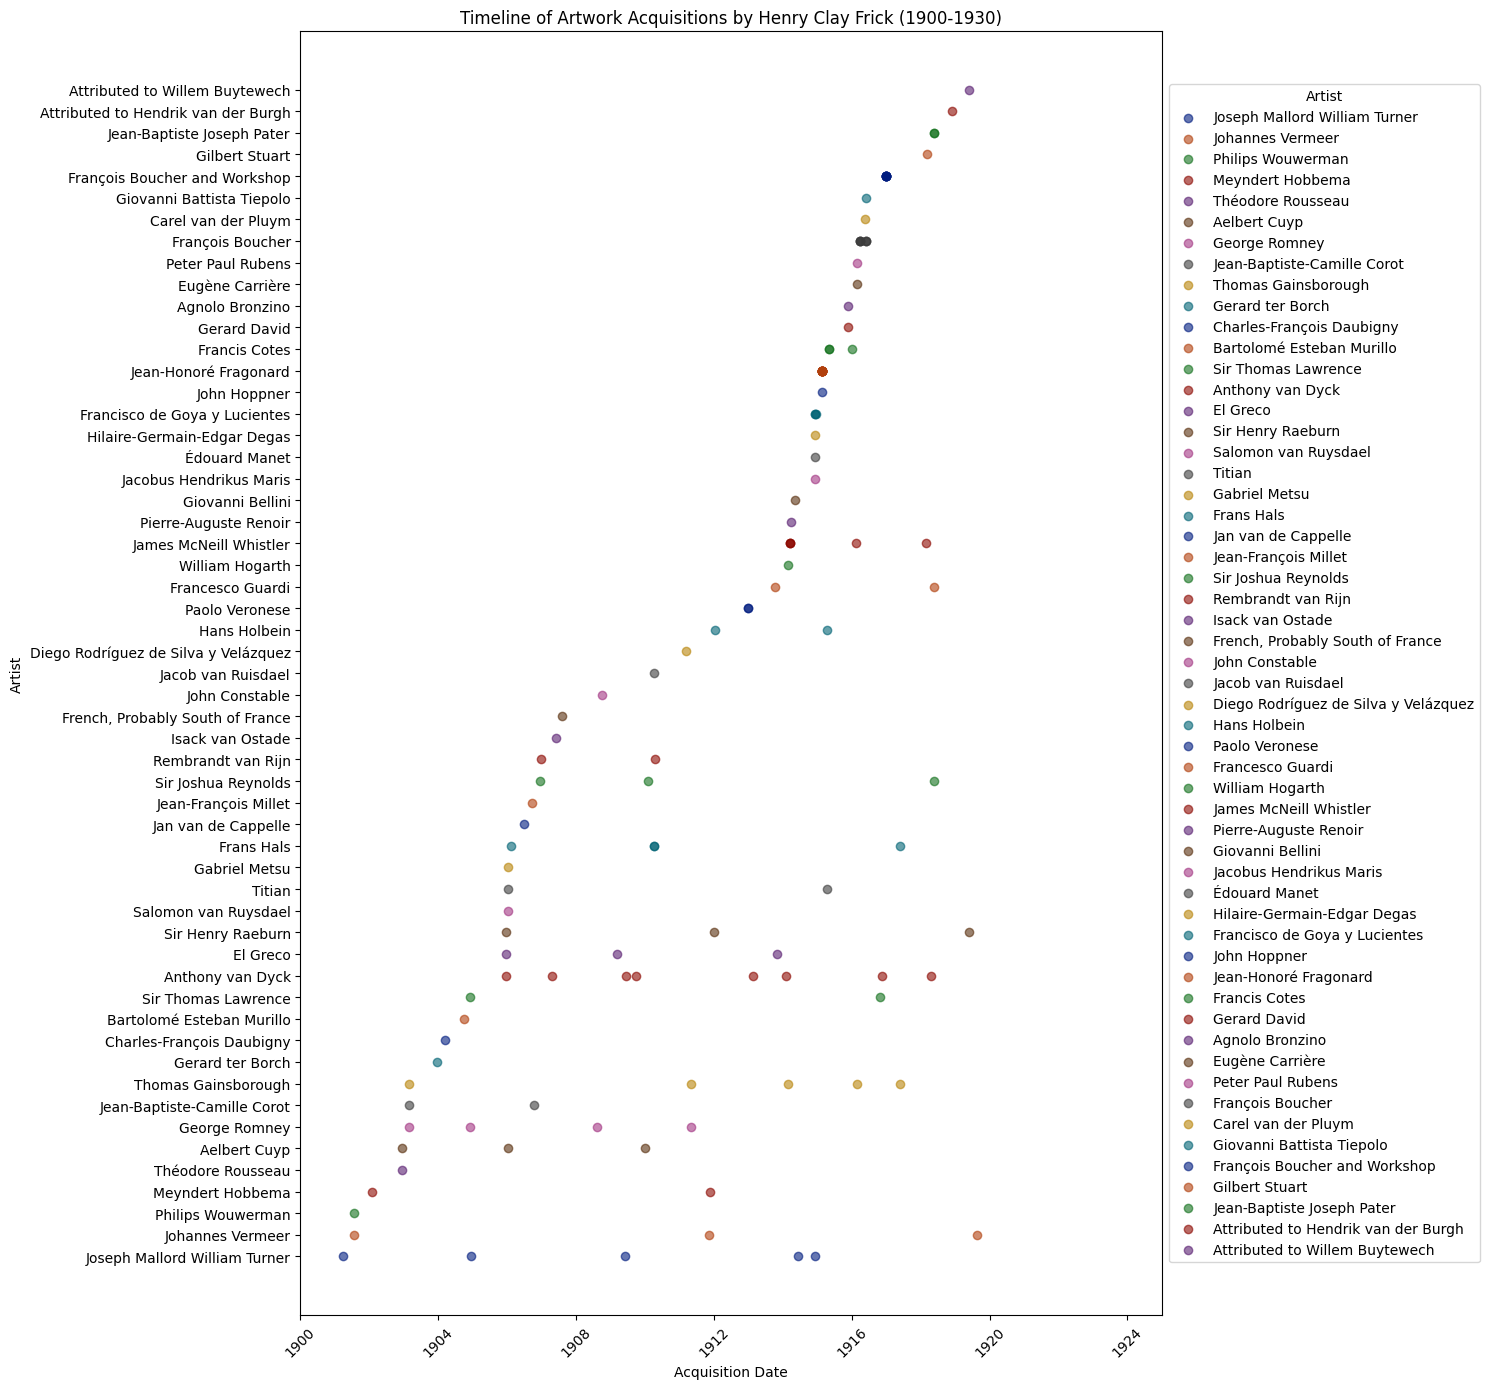

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Assuming df_art_collector_data is your DataFrame with the data loaded.

# Convert acquisition dates to datetime
df_art_collector_data['Acquisition Date'] = pd.to_datetime(df_art_collector_data['Henry Clay Frick Acquisition Date'], errors='coerce')

# Drop rows where Acquisition Date is NaT
df_art_collector_data = df_art_collector_data.dropna(subset=['Acquisition Date'])

# Filter the DataFrame to include only dates between 1900 and 1930
df_art_collector_data = df_art_collector_data[(df_art_collector_data['Acquisition Date'] >= '1900-01-01') & (df_art_collector_data['Acquisition Date'] <= '1930-12-31')]

# Sort the DataFrame based on Acquisition Date
df_art_collector_data = df_art_collector_data.sort_values(by='Acquisition Date')

# Get unique artists
unique_artists = df_art_collector_data['Artist'].unique()

# Create a color palette with as many colors as there are unique artists
palette = sns.color_palette("dark", len(unique_artists))

# Plotting
plt.figure(figsize=(15, 14))
for i, artist in enumerate(unique_artists):
    artist_data = df_art_collector_data[df_art_collector_data['Artist'] == artist]
    plt.scatter(artist_data['Acquisition Date'], artist_data['Artist'], label=artist, alpha=0.6, color=palette[i])

# Rotate x-ticks for better readability
plt.xticks(rotation=45)
plt.xlabel('Acquisition Date')
plt.ylabel('Artist')
plt.title('Timeline of Artwork Acquisitions by Henry Clay Frick (1900-1930)')
plt.tight_layout()  # Adjust the padding between and around subplots

# Add a legend to the right side
plt.legend(title='Artist', loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlim(pd.Timestamp('1900-01-01'), pd.Timestamp('1924-12-31'))  # Set x-axis limits

# adjust the layout to accomodate the legend
plt.tight_layout()

plt.savefig('/content/drive/MyDrive/Spring_2024/CSC_46000/Homework_2/Ayan_Das_24073854_hw2_t2v1.png')
plt.show()


<ipython-input-100-537efd5d9ff8>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




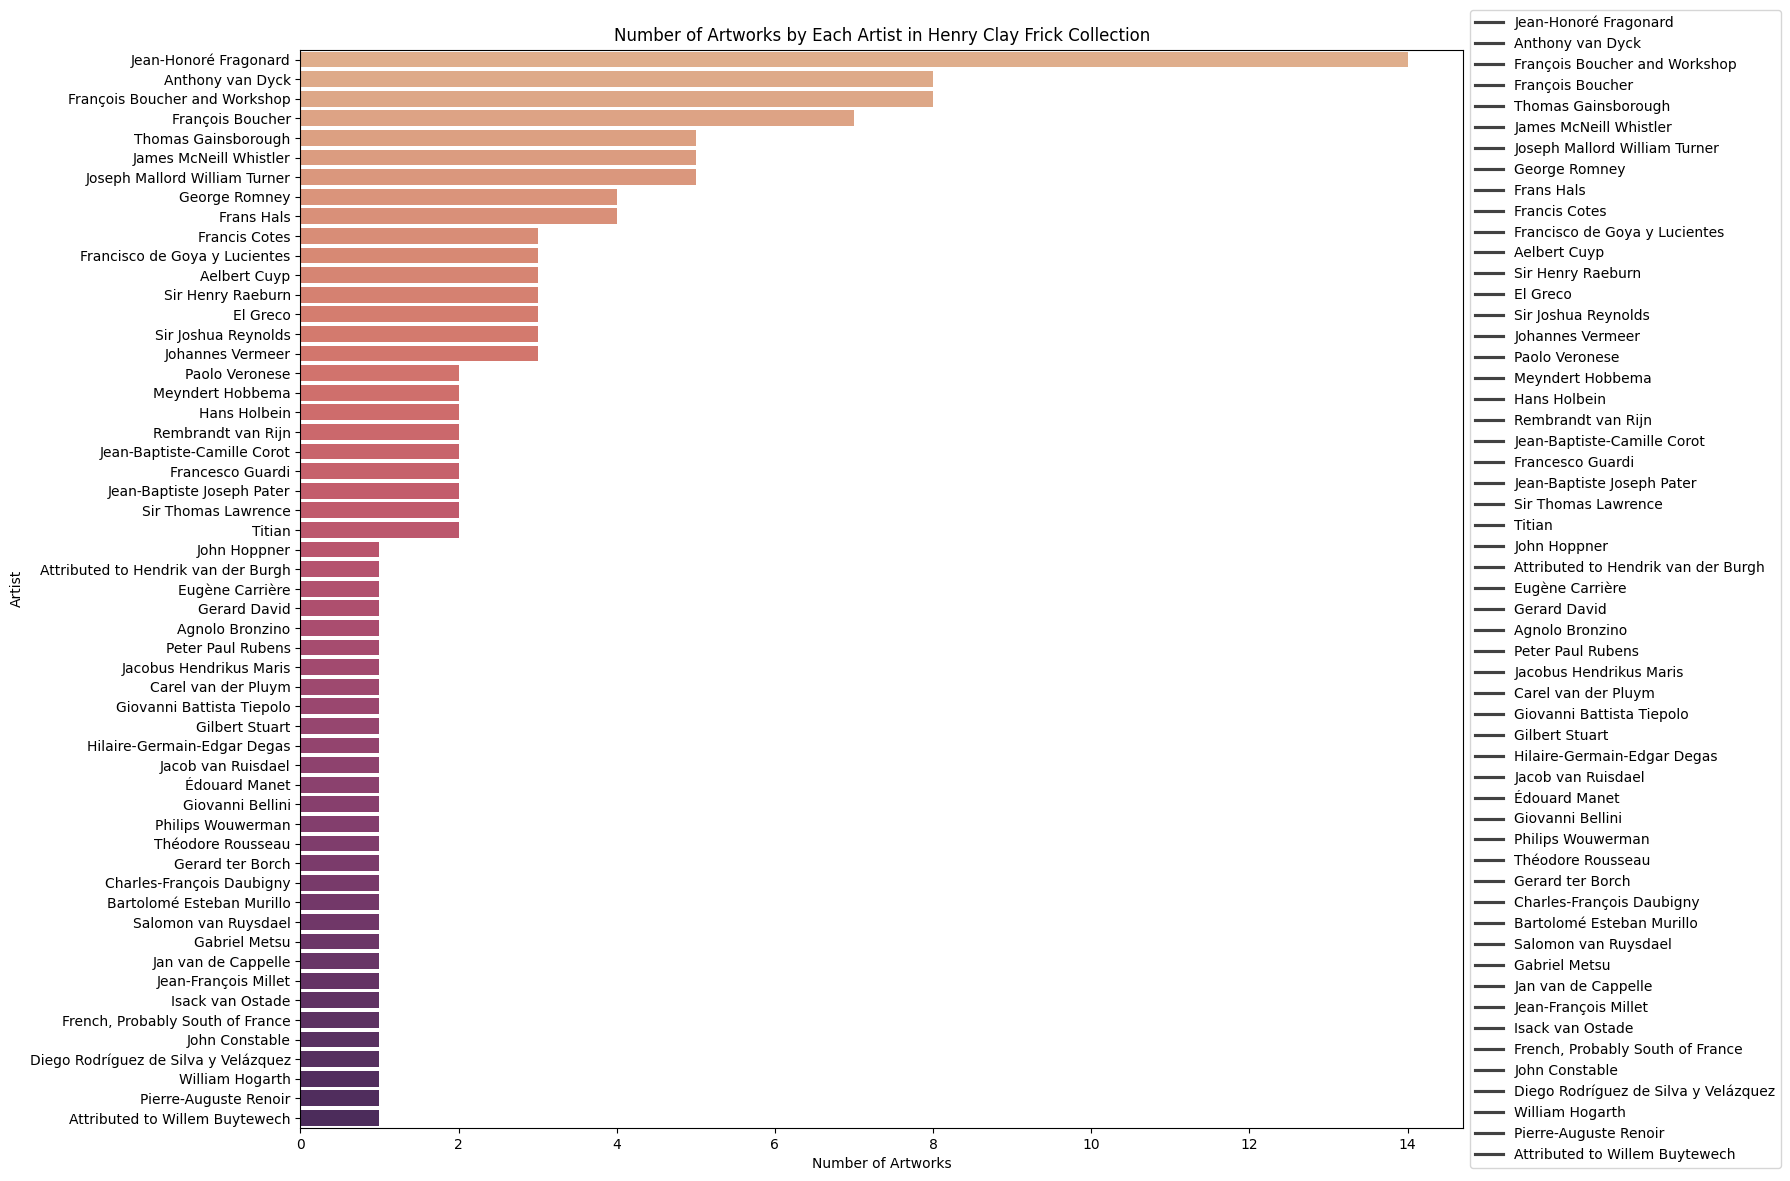

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df_art_collector_data is your DataFrame with the data loaded.

# Count the number of artworks by each artist
artist_counts = df_art_collector_data['Artist'].value_counts()

# Create a dark color palette with as many colors as there are unique artists
palette = sns.color_palette("flare", len(artist_counts))

# Plotting
plt.figure(figsize=(15, 14))
barplot = sns.barplot(x=artist_counts.values, y=artist_counts.index, palette=palette)

# Add legend to the right side
legend_labels = list(artist_counts.index)
plt.legend(legend_labels, loc='center left', bbox_to_anchor=(1, 0.5))

plt.xlabel('Number of Artworks')
plt.ylabel('Artist')
plt.title('Number of Artworks by Each Artist in Henry Clay Frick Collection')
plt.savefig('/content/drive/MyDrive/Spring_2024/CSC_46000/Homework_2/Ayan_Das_24073854_hw2_t2v2.png')
plt.show()
